In [61]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tools.plotting import autocorrelation_plot
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, roc_curve
from sklearn.metrics import jaccard_similarity_score
import seaborn as sns
import re
from bisect import bisect
import datetime 
pd.options.display.max_columns = 999
plt.style.use('ggplot')

In [81]:
lst_f_featureimportance = glob.glob("log/FeatureImportanceList*.csv")
lst_f_income = glob.glob("log/Income*.csv")
lst_f_prob = glob.glob("log/probability*.csv")
lst_f_performance = glob.glob("log/ModelPerformance_2018*.txt")
lst_f_res = glob.glob("results/*.csv")
# lst_f_roc = glob.glob("roc_assess/*.csv")
lst_f_input = glob.glob("input_test/7.7/*.csv")

In [4]:
# ###2nd run
# lst_f_featureimportance_2nd = glob.glob("backup/log_assess/*.csv") 
# lst_f_performance_2nd = glob.glob("backup/log_assess/*.txt")
# lst_f_res_2nd = glob.glob("backup/result_assess/*.csv")
# lst_f_roc_2nd = glob.glob("backup/roc_assess/*.csv")

## 1. Accuracy/Kappa/AUC/Recall/F1

### Value tendency

In [86]:
lst_performance = []
for filename in lst_f_performance:
    with open(filename) as f:
        lst_performance.append([i for i in f.read().split("\n") if i.strip()])

dict_performance = {}
dict_performance['accuracy'] = []
dict_performance['kappa'] = []
dict_performance['auc'] = []
dict_performance['recall'] = []
dict_performance['precision'] = []
dict_performance['f1'] = []

for p in lst_performance:
#     dict_performance['accuracy'].append(float(p[4].strip()))
#     dict_performance['kappa'].append(float(p[5].strip()))
#     dict_performance['auc'].append(float(p[6].strip()))
#     dict_performance['recall'].append(float(p[7].strip()))
#     dict_performance['precision'].append(float(p[8].strip()))
#     em = p[9]
#     dict_performance['f1'].append(float(em[em.find('=')+2:].strip()))
    for em in p:
        if 'Accuracy' in em:
            dict_performance['accuracy'].append(float(em[em.find('=')+2:].strip()))
        if 'kappa' in em:
            dict_performance['kappa'].append(float(em[em.find('=')+2:].strip()))
        if 'AUC' in em:
            dict_performance['auc'].append(float(em[em.find('=')+2:].strip()))
        if 'recall' in em:
            dict_performance['recall'].append(float(em[em.find('=')+2:].strip()))
        if 'precision' in em:
            dict_performance['precision'].append(float(em[em.find('=')+2:].strip()))
        if 'f1' in em:
            dict_performance['f1'].append(float(em[em.find('=')+2:].strip()))

df_performance = pd.DataFrame(dict_performance)

dict_date = {}
dict_date['date'] = [fn.replace("log/ModelPerformance_", "").replace(".txt","") for fn in lst_f_performance]
df_date = pd.DataFrame(dict_date)
df_performance = df_performance.join(df_date)

df_performance['date'] = pd.to_datetime(df_performance['date'])
df_performance = df_performance.sort_values(by='date').reset_index(drop=True)

In [51]:
### 2nd run
# lst_performance_2nd = []
# for filename in lst_f_performance_2nd:
#     with open(filename) as f:
#         lst_performance_2nd.append([i for i in f.read().split("\n") if i.strip()])

# dict_performance_2nd = {}
# dict_performance_2nd['accuracy'] = []
# dict_performance_2nd['kappa'] = []
# dict_performance_2nd['auc'] = []
# dict_performance_2nd['recall'] = []
# dict_performance_2nd['precision'] = []
# dict_performance_2nd['f1'] = []

# for p in lst_performance_2nd:
#     for em in p:
#         if 'Accuracy' in em:
#             dict_performance_2nd['accuracy'].append(float(em[em.find('=')+2:].strip()))
#         if 'kappa' in em:
#             dict_performance_2nd['kappa'].append(float(em[em.find('=')+2:].strip()))
#         if 'AUC' in em:
#             dict_performance_2nd['auc'].append(float(em[em.find('=')+2:].strip()))
#         if 'recall' in em:
#             dict_performance_2nd['recall'].append(float(em[em.find('=')+2:].strip()))
#         if 'precision' in em:
#             dict_performance_2nd['precision'].append(float(em[em.find('=')+2:].strip()))
#         if 'f1' in em:
#             dict_performance_2nd['f1'].append(float(em[em.find('=')+2:].strip()))

# df_performance_2nd = pd.DataFrame(dict_performance_2nd)

# dict_date_2nd = {}
# dict_date_2nd['date'] = [fn.replace("backup/log_assess/ModelPerformance_", "").replace(".txt","") for fn in lst_f_performance_2nd]
# df_date_2nd = pd.DataFrame(dict_date_2nd)
# df_performance_2nd = df_performance_2nd.join(df_date_2nd)

# df_performance_2nd['date'] = pd.to_datetime(df_performance_2nd['date'])
# df_performance_2nd = df_performance_2nd.sort_values(by='date').reset_index(drop=True)
# # df_performance.set_index(['date'],inplace=True)

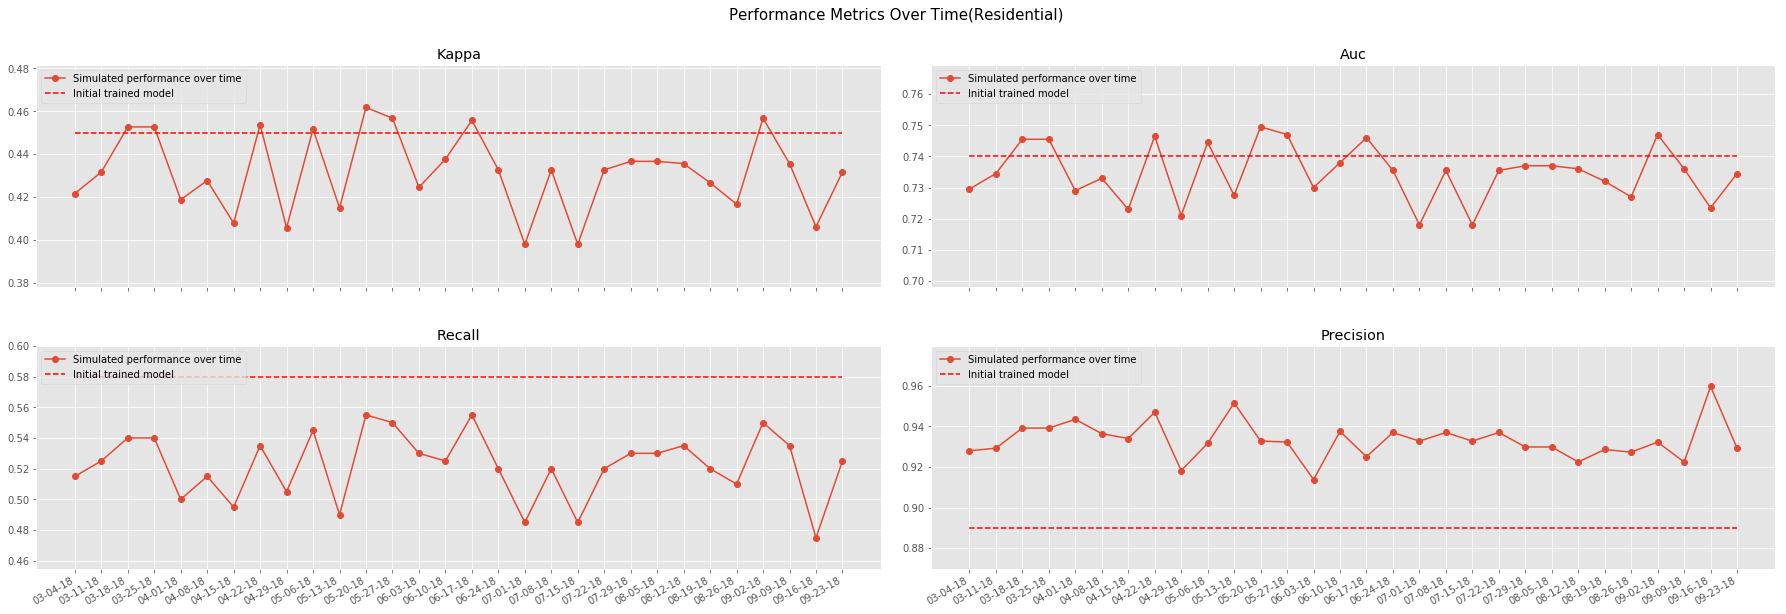

In [87]:
kappa_kdd = 0.45
auc_kdd = 0.74
recall_kdd = 0.58
precision_kdd = 0.89
post_deploy = 'Simulated performance over time'
pre_deploy = "Initial trained model"

fig, axes = plt.subplots(2,2,figsize=(25,10))
ax = axes.flat
# ax[0].plot(df_performance['accuracy'], marker='o')
# # ax[0].plot(df_performance_2nd['date'], df_performance_2nd['accuracy'], marker='o')
# ax[0].set_title("Accuracy")
# ax[0].legend(['1st run','2nd run'])

ax[0].plot(df_performance['kappa'], marker='o')
ax[0].plot(np.full((df_performance.shape[0]), kappa_kdd), ls='dashed', color = 'r')
# ax[1].plot(df_performance_2nd['date'], df_performance_2nd['kappa'], marker='o')
ax[0].set_title("Kappa")
max_lim = max(df_performance['kappa'].max(), kappa_kdd)+0.02
min_lim = min(df_performance['kappa'].min(), kappa_kdd)-0.02
ax[0].set_ylim([min_lim, max_lim])
# ax[1].legend(['1st run','2nd run'])

ax[1].plot(df_performance['auc'], marker='o')
ax[1].plot(np.full((df_performance.shape[0]), auc_kdd), ls='dashed', color = 'r')
# ax[2].plot(df_performance_2nd['date'], df_performance_2nd['auc'], marker='o')
ax[1].set_title("Auc")
max_lim = max(df_performance['auc'].max(), auc_kdd)+0.02
min_lim = min(df_performance['auc'].min(), auc_kdd)-0.02
ax[1].set_ylim([min_lim, max_lim])
# ax[2].legend(['1st run','2nd run'])

ax[2].plot(df_performance['recall'], marker='o')
ax[2].plot(np.full((df_performance.shape[0]), recall_kdd), ls='dashed', color = 'r')
# ax[3].plot(df_performance_2nd['date'], df_performance_2nd['recall'], marker='o')
ax[2].set_title("Recall")
max_lim = max(df_performance['recall'].max(), recall_kdd)+0.02
min_lim = min(df_performance['recall'].min(), recall_kdd)-0.02
ax[2].set_ylim([min_lim, max_lim])
# ax[3].legend(['1st run','2nd run'])

ax[3].plot(df_performance['precision'], marker='o')
ax[3].plot(np.full((df_performance.shape[0]), precision_kdd), ls='dashed', color = 'r')
# ax[4].plot(df_performance_2nd['date'], df_performance_2nd['precision'], marker='o')
ax[3].set_title("Precision")
max_lim = max(df_performance['precision'].max(), precision_kdd)+0.02
min_lim = min(df_performance['precision'].min(), precision_kdd)-0.02
ax[3].set_ylim([min_lim, max_lim])
# ax[4].legend(['1st run','2nd run'])

# ax[5].plot(df_performance['f1'], marker='o')
# # ax[5].plot(df_performance_2nd['date'], df_performance_2nd['f1'], marker='o')
# ax[5].set_title("F1")
# ax[5].legend(['1st run','2nd run'])

for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=45)  
    ax.set_xticks(np.arange(len(df_performance['date'])))
    ax.set_xticklabels(df_performance['date'].dt.strftime("%m-%d-%y"), rotation = -45, ha='left')
    ax.legend([post_deploy, pre_deploy], loc = 'upper left')
fig.suptitle("Performance Metrics Over Time(Residential)", fontsize=15)
plt.tight_layout()
fig.autofmt_xdate()
plt.subplots_adjust(top=0.9)
plt.savefig("analysis_plotting/Performance Metrics Over Time_Residential.pdf")

### Mean/std tendency

In [69]:
df_statistic = pd.DataFrame()
for col in df_performance:
    if col in ['accuracy', 'auc', 'f1', 'kappa', 'precision' ,'recall']:
        df_statistic['mean_%s'%col] = df_performance[col].expanding().mean()
        df_statistic['std_%s'%col] = df_performance[col].expanding().std()
        
df_statistic['date'] = df_performance['date']
df_statistic = df_statistic.iloc[1:,:].reset_index(drop=True)
label_time_window = pd.Series(["over %d week"%i for i in range(1,32)], name='time window')
df_statistic = pd.concat([df_statistic,label_time_window], axis=1)

In [62]:
# #### 2nd run ###
# df_statistic_2nd = pd.DataFrame()
# for col in df_performance_2nd:
#     if col in ['accuracy', 'auc', 'f1', 'kappa', 'precision' ,'recall']:
#         df_statistic_2nd['mean_%s'%col] = df_performance_2nd[col].expanding().mean()
#         df_statistic_2nd['std_%s'%col] = df_performance_2nd[col].expanding().std()
        
# df_statistic_2nd['date'] = df_performance_2nd['date']
# df_statistic_2nd = df_statistic_2nd.iloc[1:,:].reset_index(drop=True)
# label_time_window_2nd = pd.Series(["over %d week"%i for i in range(1,21)], name='time window')
# df_statistic_2nd = pd.concat([df_statistic_2nd,label_time_window_2nd], axis=1)

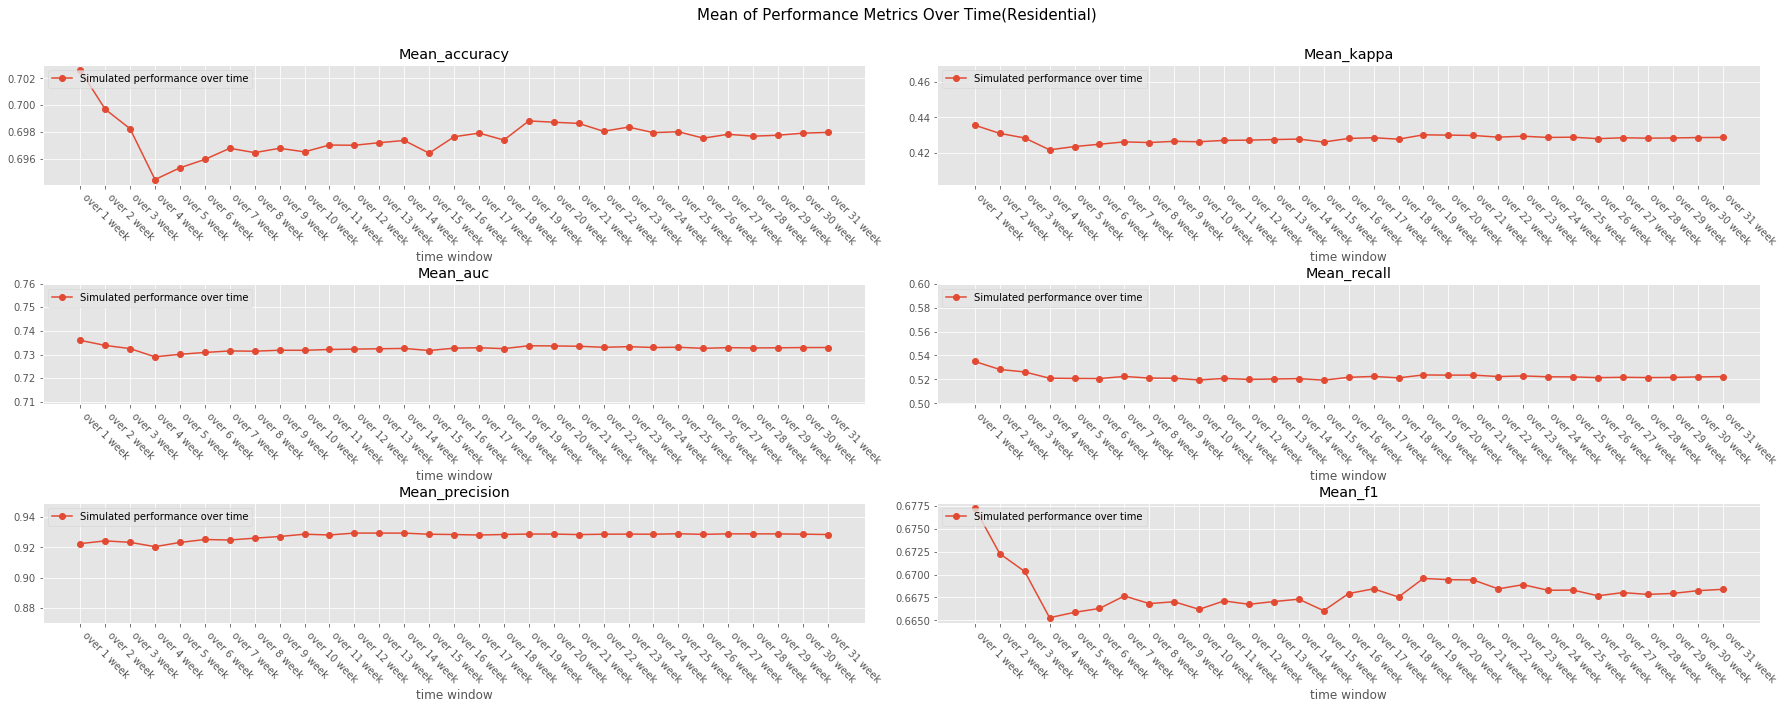

In [75]:
fig, axes = plt.subplots(3,2,figsize=(25,10))
ax = axes.flat
df_statistic.plot(x='time window', y='mean_accuracy', ax = ax[0], marker='o')
# df_statistic_2nd.plot(x='time window', y='mean_accuracy', ax = ax[0], marker='o')
ax[0].set_title("Mean_accuracy")
# ax[0].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='mean_kappa', ax = ax[1], marker='o')
# ax[0].plot(np.full((df_statistic.shape[0]), kappa_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_kappa', ax = ax[1], marker='o')
ax[1].set_title("Mean_kappa")
max_lim = max(df_statistic['mean_kappa'].max(), kappa_kdd)+0.02
min_lim = min(df_statistic['mean_kappa'].min(), kappa_kdd)-0.02
ax[1].set_ylim([min_lim, max_lim])
# ax[1].legend(['1st run','2nd run'])


df_statistic.plot(x='time window', y='mean_auc', ax = ax[2], marker='o')
# ax[1].plot(np.full((df_performance.shape[0]), auc_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_auc', ax = ax[2], marker='o')
ax[2].set_title("Mean_auc")
max_lim = max(df_statistic['mean_auc'].max(), auc_kdd)+0.02
min_lim = min(df_statistic['mean_auc'].min(), auc_kdd)-0.02
ax[2].set_ylim([min_lim, max_lim])
# ax[2].legend(['1st run','2nd run'])


df_statistic.plot(x='time window', y='mean_recall', ax = ax[3], marker='o')
# ax[2].plot(np.full((df_performance.shape[0]), recall_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_recall', ax = ax[3], marker='o')
max_lim = max(df_statistic['mean_recall'].max(), recall_kdd)+0.02
min_lim = min(df_statistic['mean_recall'].min(), recall_kdd)-0.02
ax[3].set_ylim([min_lim, max_lim])
ax[3].set_title("Mean_recall")
# ax[3].legend(['1st run','2nd run'])


df_statistic.plot(x='time window', y='mean_precision', ax = ax[4], marker='o')
# ax[3].plot(np.full((df_performance.shape[0]), precision_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_precision', ax = ax[4], marker='o')
max_lim = max(df_statistic['mean_precision'].max(), precision_kdd)+0.02
min_lim = min(df_statistic['mean_precision'].min(), precision_kdd)-0.02
ax[4].set_ylim([min_lim, max_lim])
ax[4].set_title("Mean_precision")
# ax[4].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='mean_f1', ax = ax[5], marker='o')
# df_statistic_2nd.plot(x='time window', y='mean_f1', ax = ax[5], marker='o')
ax[5].set_title("Mean_f1")
# ax[5].legend(['1st run','2nd run'])

for ax in fig.axes:
#     plt.sca(ax)
    ax.set_xticks(np.arange(len(df_statistic['time window'])))
    ax.set_xticklabels(df_statistic['time window'], rotation = -45, ha='left')
    ax.legend([post_deploy, pre_deploy], loc = 'upper left')
#     plt.xticks(rotation=45)
fig.suptitle("Mean of Performance Metrics Over Time (Residential)", fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("analysis_plotting/Mean of Performance Metrics Over Time_Residential.pdf")

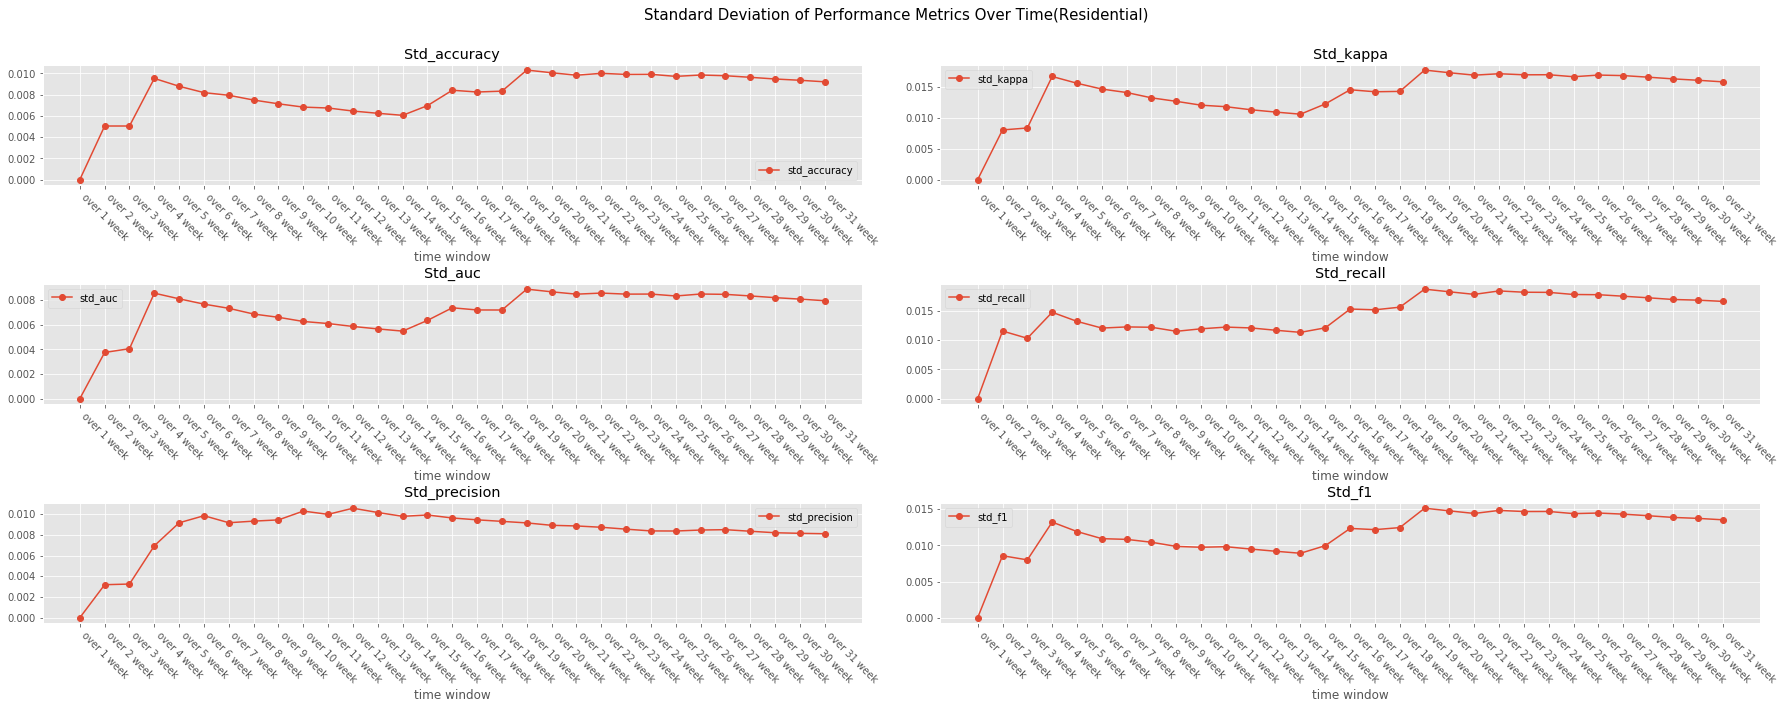

In [1070]:
fig, axes = plt.subplots(3,2,figsize=(25,10))
ax = axes.flat
df_statistic.plot(x='time window', y='std_accuracy', ax = ax[0], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_accuracy', ax = ax[0], marker='o')
ax[0].set_title("Std_accuracy")
# ax[4].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='std_kappa', ax = ax[1], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_kappa', ax = ax[1], marker='o')
ax[1].set_title("Std_kappa")
# ax[1].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='std_auc', ax = ax[2], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_auc', ax = ax[2], marker='o')
ax[2].set_title("Std_auc")
# ax[2].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='std_recall', ax = ax[3], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_recall', ax = ax[3], marker='o')
ax[3].set_title("Std_recall")
# ax[3].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='std_precision', ax = ax[4], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_precision', ax = ax[4], marker='o')
ax[4].set_title("Std_precision")
# ax[4].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='std_f1', ax = ax[5], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_f1', ax = ax[5], marker='o')
ax[5].set_title("Std_f1")
# ax[5].legend(['1st run','2nd run'])

for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=45)
    ax.set_xticks(np.arange(len(df_statistic['time window'])))
    ax.set_xticklabels(df_statistic['time window'], rotation = -45, ha='left')
    
fig.suptitle("Standard Deviation of Performance Metrics Over Time(Residential)", fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("analysis_plotting/Std of Performance Metrics Over Time_Residential.pdf")

### Empirical Risk Score

In [3]:
lst_f_res.sort()
lst_f_input.sort()
lst_df_pred = []
for filename in lst_f_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)
lst_df_truth = []
for filename in lst_f_input:
    df_truth = pd.read_csv(filename)
    lst_df_truth.append(df_truth)
lst_df_income = []
for filename in lst_f_income:
    df_income = pd.read_csv(filename, index_col=False)
    lst_df_income.append(df_income)

In [4]:
def getThreshold(df_truth):
    df_threshold = df_truth.filter(regex=("^Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - .*"))
    one_person = 12332
    two_people = 15661
    three_people = 19515
    four_people = 25094
    five_people = 29714
    six_people = 33618
    sevenMore_people = 38173
    df_threshold = df_threshold.rename(columns={
        'Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - 1-person household': 'one',
        'Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - 2-person household': 'two',
        'Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - 3-person household': 'three',
        'Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - 4-person household': 'four',
        'Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - 5-person household': 'five',
        'Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - 6-person household': 'six',
        'Percent; TENURE BY HOUSEHOLD SIZE - Owner-occupied housing units - 7-or-more-person household': 'sevenMore'
    })
    df_threshold = df_threshold.apply(pd.to_numeric, errors='coerce')
    df_threshold = df_threshold.fillna(100/7)

    df_truth['Threshold'] = df_threshold.apply(lambda x: (x.one * one_person +
                                            x.two * two_people + 
                                            x.three * three_people + 
                                            x.four * four_people +
                                            x.five * five_people + 
                                            x.six * six_people + 
                                            x.sevenMore * sevenMore_people) / 100, axis=1)
    return df_truth

In [5]:
def encode_income(df):
    lower_bound_income = [int(re.search(r'\$([0-9|,]+)', i).group(1).replace(",","")) for i in df.columns if "Estimate; Total:" in i]
    idx_poor_start = 3
    idx_rich_end = 3 + len(lower_bound_income)
    df['index_thres'] = df.apply(lambda x: bisect(lower_bound_income, x.Threshold), axis=1)
    df['idx_poor_end'] = df.apply(lambda x: int(idx_poor_start + x.index_thres - 1), axis=1)
    df['idx_rich_start'] = df.apply(lambda x: int(x.idx_poor_end), axis=1)
    df['poor_total'] = df.apply(lambda x: x[idx_poor_start:df.loc[x.name,'idx_poor_end']].sum(), axis=1)
    df['rich_total'] = df.apply(lambda x: x[df.loc[x.name,'idx_rich_start']:idx_rich_end].sum(), axis=1)
    df['income'] = df.apply(lambda x: 0 if x['poor_total'] >= x['rich_total'] else 1, axis=1)
    return df


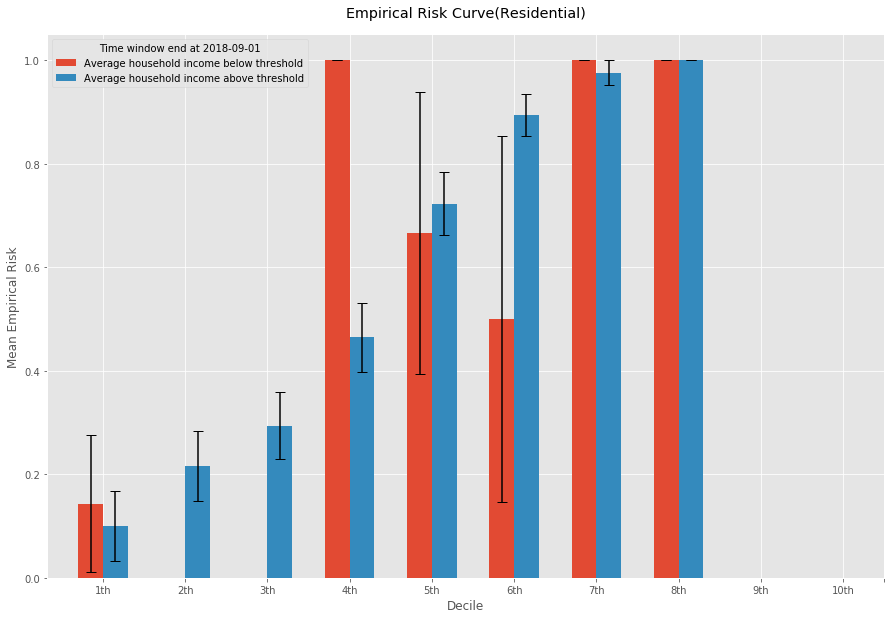

In [58]:
def groupRiskScore(x):
    if (x <= 0.1):
        return 1
    elif (x <=0.2):
        return 2
    elif (x <=0.3):
        return 3
    elif (x <=0.4):
        return 4
    elif (x <=0.5):
        return 5
    elif (x <=0.6):
        return 6
    elif (x <=0.7):
        return 7
    elif (x <=0.8):
        return 8
    elif (x <=0.9):
        return 9
    else:
        return 10
    
pd.options.mode.chained_assignment = None 
# threshold_income = 40000
fig, ax = plt.subplots(1,1,figsize=(15,10))
bar_width = 0.3
lst_name = []
for i in range(len(lst_f_res)):
#     if (i%7!=0):
#         continue
    curve_name = (lst_f_res[i])[16:-4]
#     if "2018-07" not in curve_name and "2018-02-23" not in curve_name:
    if "2018-09-01" not in curve_name:
        continue
    lst_name.append(curve_name)
    df_pred = lst_df_pred[i]
    df_truth = lst_df_truth[i]
    df_income = lst_df_income[i]
    df_truth = getThreshold(df_truth)
    df_riskscore = pd.concat([df_pred['RiskScore'], df_truth[['fire', 'Threshold']], df_income], axis=1)
    df_riskscore = encode_income(df_riskscore)
    df_riskscore['group'] = df_riskscore['RiskScore'].apply(lambda x: groupRiskScore(x))
    
    df_riskscore_poor = df_riskscore[df_riskscore['income']==0]
    df_riskscore_rich = df_riskscore[df_riskscore['income']==1]
    
#     df_riskscore_poor['group'] = pd.qcut(df_riskscore_poor['RiskScore'], q=10)
    res_poor = df_riskscore_poor.groupby('group')['fire'].mean()

    ax.bar(list(res_poor.index-bar_width/2), res_poor, width=bar_width, capsize=5,
           yerr=df_riskscore_poor.groupby('group')['fire'].apply(lambda x: np.sqrt(x.mean()*(1-x.mean()) / x.count())))
    
    if (df_riskscore_rich.shape[0]>0):
#         df_riskscore_rich['group'] = pd.qcut(df_riskscore_rich['RiskScore'], q=10)
        res_rich = df_riskscore_rich.groupby('group')['fire'].mean()
        ax.bar(list(res_rich.index+bar_width/2), res_rich, width=bar_width, capsize=5,
               yerr=df_riskscore_rich.groupby('group')['fire'].apply(lambda x: np.sqrt(x.mean()*(1-x.mean()) / x.count())))
    
#     df_riskscore['group'] = pd.qcut(df_riskscore['RiskScore'], q=10)
#     res = df_riskscore.groupby('group')['fire'].mean()
#     ax.bar(range(len(res)), res, width=0.3, yerr=df_riskscore.groupby('group')['fire'].std())
    
ax.set_xticks(np.append(np.arange(1, 11, 1), 10.5))
ax.set_xticklabels(["%dth"%i for i in ax.get_xticks() if i != 10.5])
ax.set_title("Empirical Risk Curve(Residential)", y=1.02)
ax.set_xlabel("Decile")
ax.set_ylabel("Mean Empirical Risk")
ax.legend(['Average household income below threshold', 'Average household income above threshold'], loc = 'upper left', title='Time window end at {0}'.format(lst_name[0]), ncol=1)
plt.savefig("analysis_plotting/Empirical Risk Barplot_Residential.pdf")

TypeError: encode_income() takes 1 positional argument but 2 were given

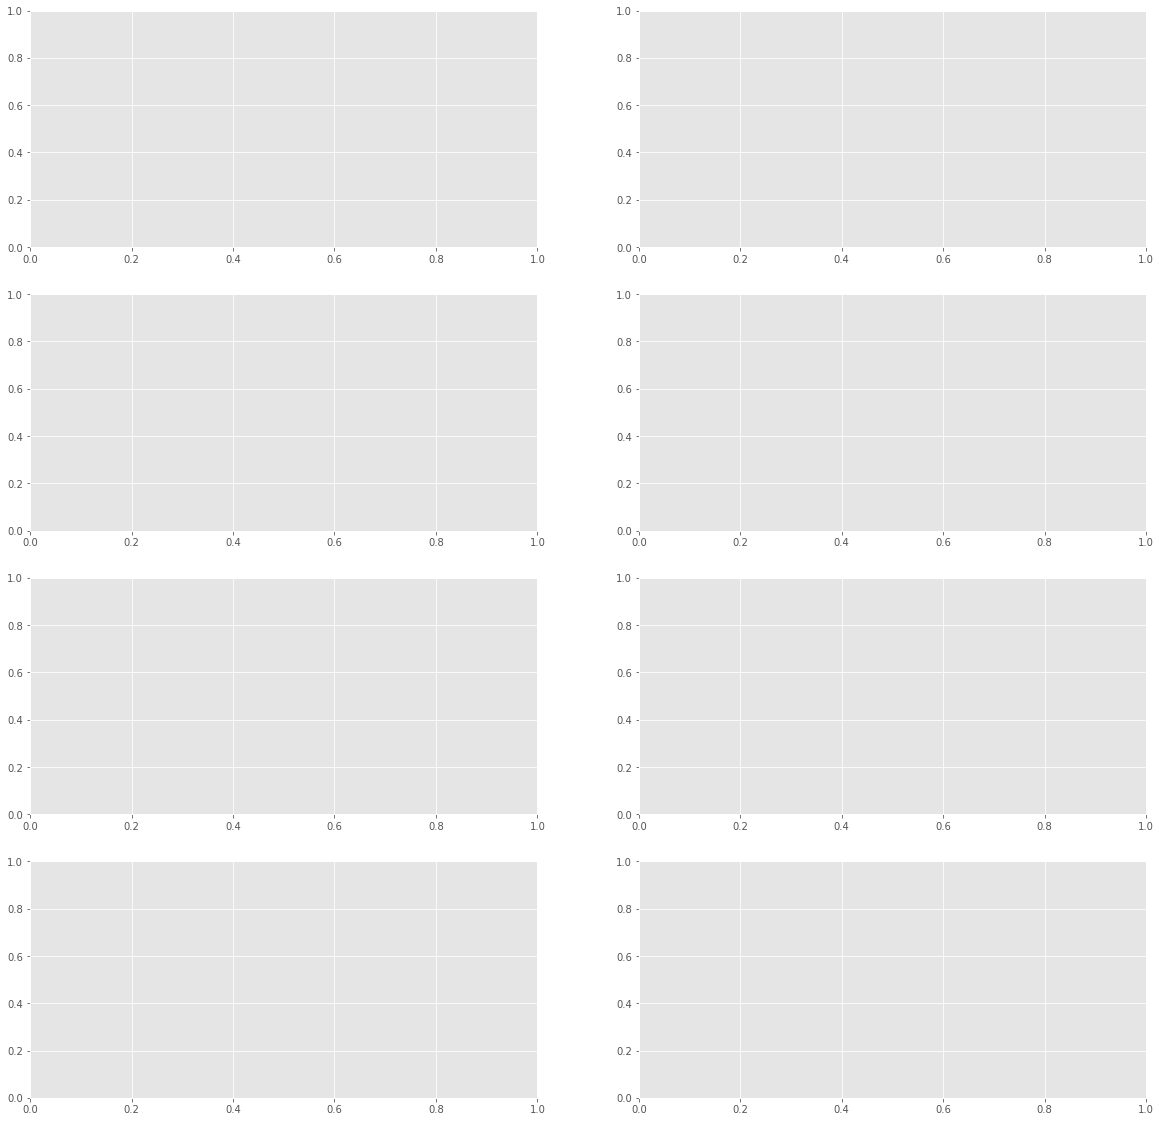

In [56]:
pd.options.mode.chained_assignment = None 
thres_lst = [10000, 20000, 30000, 40000, 50000, 60000, 100000, 200000]

fig, axes = plt.subplots(4,2,figsize=(20,20))
axes = axes.flat
for idx, ax in enumerate(axes):
    threshold_income = thres_lst[idx]
    lst_name = []
    for i in range(len(lst_f_res)):
    #     if (i%7!=0):
    #         continue
        curve_name = (lst_f_res[i])[16:-4]
    #     if "2018-07" not in curve_name and "2018-02-23" not in curve_name:
        if "2018-09-01" not in curve_name:
            continue
        lst_name.append(curve_name)
        df_pred = lst_df_pred[i]
        df_truth = lst_df_truth[i]
        df_income = lst_df_income[i]
        df_riskscore = pd.concat([df_pred['RiskScore'], df_truth['fire'], df_income], axis=1)
        df_riskscore = encode_income(df_riskscore, threshold_income)
    #     display(df_riskscore)

        df_riskscore_poor = df_riskscore[df_riskscore['income']==0]
        df_riskscore_rich = df_riskscore[df_riskscore['income']==1]

        df_riskscore_poor['group'] = pd.qcut(df_riskscore_poor['RiskScore'], q=10)
        res_poor = df_riskscore_poor.groupby('group')['fire'].mean()

        ax.bar(range(len(res_poor)), res_poor, width=0.3, capsize=5,
               yerr=df_riskscore_poor.groupby('group')['fire'].apply(lambda x: np.sqrt(x.mean()*(1-x.mean()) / x.count())))

        if (df_riskscore_rich.shape[0]>0):
            df_riskscore_rich['group'] = pd.qcut(df_riskscore_rich['RiskScore'], q=10)
            res_rich = df_riskscore_rich.groupby('group')['fire'].mean()
            ax.bar(np.array(range(len(res_rich))) + 0.3, res_rich, width=0.3, capsize=5,
                   yerr=df_riskscore_rich.groupby('group')['fire'].apply(lambda x: np.sqrt(x.mean()*(1-x.mean()) / x.count())))


    #     df_riskscore['group'] = pd.qcut(df_riskscore['RiskScore'], q=10)
    #     res = df_riskscore.groupby('group')['fire'].mean()
    #     ax.bar(range(len(res)), res, width=0.3, yerr=df_riskscore.groupby('group')['fire'].std())

    ax.set_xticks(range(len(res)))
    ax.set_xticklabels(["%.1f"%((i+1)*0.1) for i in range(len(res))])
    ax.set_title("Empirical Risk Curve(Residential)", y=1.02)
    ax.set_xlabel("Upper Limits of Percentiles")
    ax.set_ylabel("Mean Empirical Risk")
    ax.legend(['poor', 'rich'], loc = 'upper left', title='Time window end at {0} and threshold ${1:,}'.format(lst_name[0], threshold_income), ncol=3)
plt.tight_layout()
plt.savefig("analysis_plotting/Empirical Risk Barplot_Residential_thres_overall.pdf")

### Precision at top K

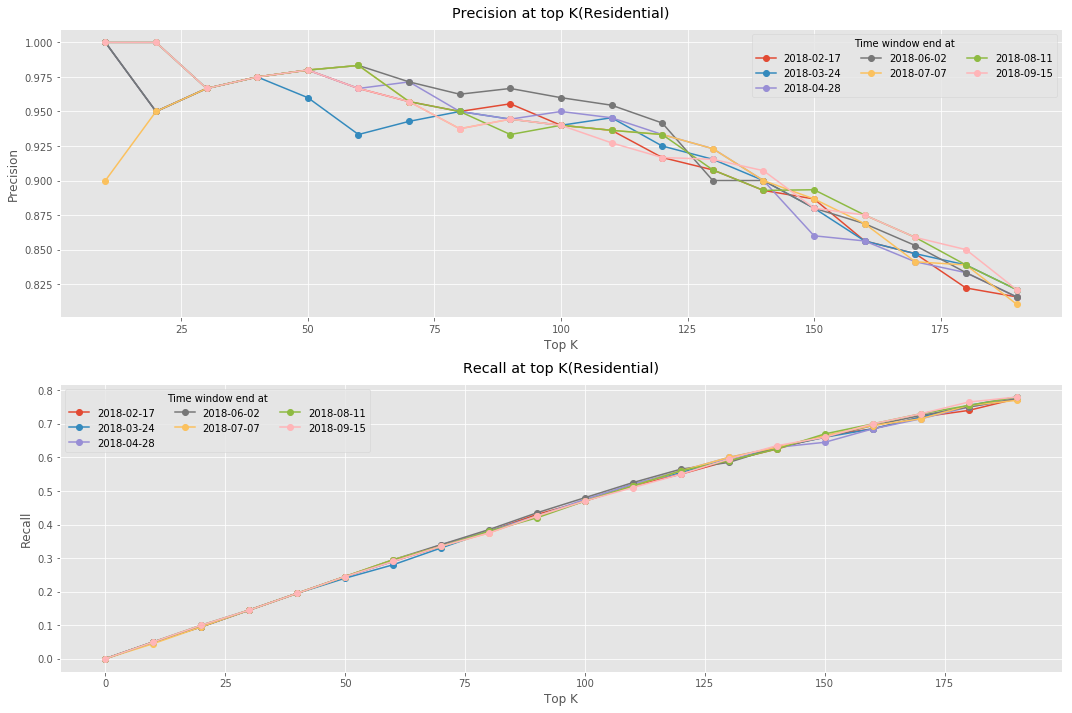

In [949]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
lst_name = []
num = 10

for i in range(len(lst_f_res)):
    curve_name = (lst_f_res[i])[16:-4]
    if (i%5!=0):
        continue
#     if "2018-07" not in curve_name and "2018-02-16" not in curve_name:
#         continue
    lst_name.append(curve_name)
    df_pred = lst_df_pred[i]
    df_truth = lst_df_truth[i]
    df_precision = pd.concat([df_truth['fire'], df_pred[['Fire', 'RiskScore']]], axis=1)
    df_precision = df_precision.rename(columns = {'fire':'fire_truth', 'Fire':'fire_pred', 'RiskScore':'RiskScore'})
    df_precision = df_precision.sort_values(by='RiskScore', ascending=False)
    
    length = df_precision.shape[0]
    group = length//num + 1
    pos_num=0
    lst_prec = []
    lst_recall = []
    lst_topK_prec = []
    lst_topK_recall = []

    for k in range(group):
        if (k==group):
            pos_num = length
            y_label = np.ones((pos_num,1))
            lst_topK.append(pos_num)

        else:
            pos_num = k*num
            y_label = np.concatenate([np.ones((pos_num,1)), np.zeros((length-pos_num,1))], axis=0)

        if pos_num>=200:
            break
        if k==0:
            lst_topK_recall.append(pos_num)
            recall = recall_score(df_precision['fire_truth'], y_label)
            lst_recall.append(recall)
            continue

        lst_topK_prec.append(pos_num)
        prec = precision_score(df_precision['fire_truth'], y_label)
        lst_prec.append(prec)

        lst_topK_recall.append(pos_num)
        recall = recall_score(df_precision['fire_truth'], y_label)
        lst_recall.append(recall)
        
    ax1.plot(lst_topK_prec, lst_prec, marker='o')
    ax2.plot(lst_topK_recall, lst_recall, marker='o')


lst_xtick_prec = [i*num for i in list(range(group)) if i!=0]
# ax1.set_xticks(lst_xtick_prec)
ax1.set_title("Precision at top K(Residential)", y=1.02)
ax1.set_xlabel("Top K")
ax1.set_ylabel("Precision")
ax1.legend(lst_name, title='Time window end at', ncol=3)

lst_xtick_recall = [i*num for i in list(range(group))]
# ax2.set_xticks(lst_xtick_recall)
ax2.set_title("Recall at top K(Residential)", y=1.02)
ax2.set_xlabel("Top K")
ax2.set_ylabel("Recall")
ax2.legend(lst_name, title='Time window end at', ncol=3)
plt.tight_layout()
plt.savefig("analysis_plotting/Precision_Recall at Top K Curve_Residential.pdf")

### Jaccard score

In [950]:
lst_f_res.sort()
lst_f_input.sort()
lst_df_pred = []
for filename in lst_f_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)
lst_df_truth = []
for filename in lst_f_input:
    df_truth = pd.read_csv(filename)
    lst_df_truth.append(df_truth)

In [952]:
lst_jcd = []

for i in range(len(lst_df_pred)):
    df_pred, df_truth = lst_df_pred[i], lst_df_truth[i]
    y_pred, y_true = df_pred['Fire'], df_truth['fire']
    jcd_score = jaccard_similarity_score(y_true, y_pred, normalize=True, sample_weight=None)
    lst_jcd.append(jcd_score)
    
lst_date = [fn.replace("results/Results_", "").replace(".csv","") for fn in lst_f_res]
lst_date = [datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%m-%d-%y') for date in lst_date]

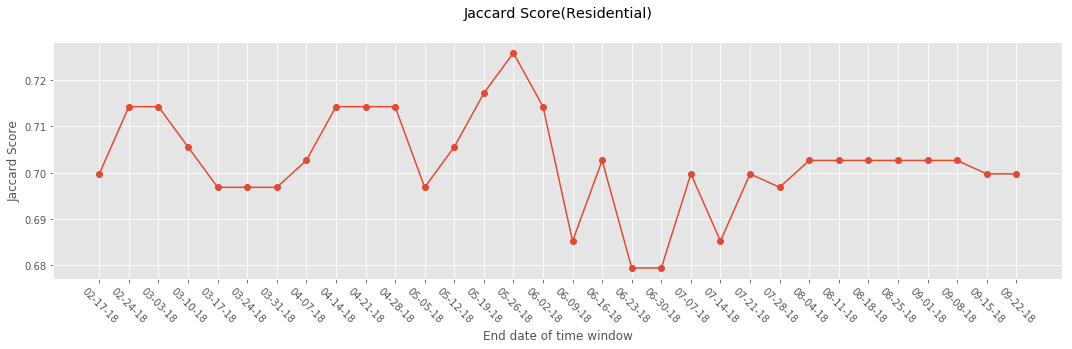

In [953]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(lst_date, lst_jcd, marker='o')
ax.set_title("Jaccard Score(Residential)", y=1.08)
ax.set_xlabel('End date of time window')
ax.set_ylabel('Jaccard Score')
ax.set_xticks(np.arange(len(lst_date)))
ax.set_xticklabels(lst_date, rotation = -45)

# fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.tight_layout()
plt.savefig("analysis_plotting/Jaccard Score Curve_Residential.pdf")

### Feature Importance 

In [958]:
lst_f_featureimportance
lst_f_featureimportance.sort()
lst_df_fi = []
for filename in lst_f_featureimportance:
    df_fi = pd.read_csv(filename,header=None)
    lst_df_fi.append(df_fi)
lst_date = [fn.replace("log/FeatureImportanceList_", "").replace(".csv","") for fn in lst_f_featureimportance]

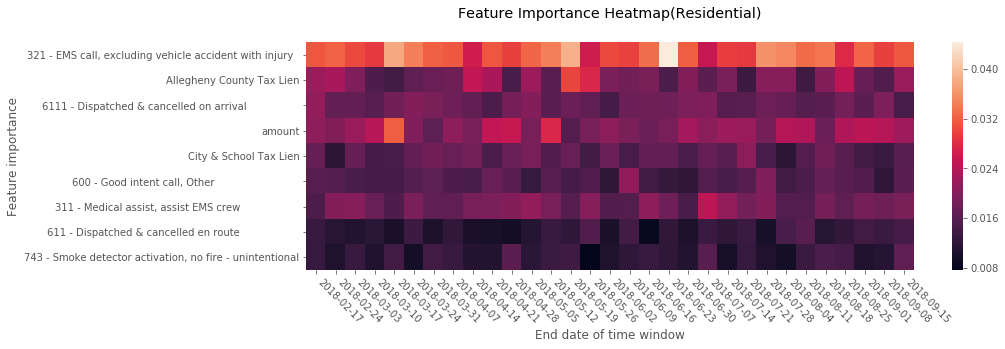

In [959]:
df_fi = lst_df_fi[0]
date_fi = lst_date[0]
df_fi = df_fi.rename(columns={0:'feature', 1: date_fi})

for i in range(1, len(lst_df_fi)):
    df = lst_df_fi[i]
    date = lst_date[i]
    df = df.rename(columns={0:'feature', 1: date})
    df_fi = df_fi.merge(df, on='feature')
    
proportion = 0.4
idx = int(df_fi.shape[0] * proportion)
fig, ax = plt.subplots(1,1,figsize=(15,5))

df_fi = df_fi.set_index('feature')
df_fi = df_fi.drop(['Ã¯..AGENCY_y','Ã¯..AGENCY_x'], axis=0)
sns.heatmap(df_fi.iloc[:idx,:], ax = ax)
ax.set_title("Feature Importance Heatmap(Residential)", y=1.08)
ax.set_xlabel('End date of time window')
ax.set_ylabel('Feature importance')
plt.xticks(rotation=-45, ha='left') 
plt.tight_layout()
plt.savefig("analysis_plotting/Feature Importance Over Time Heatmap_Residential.pdf")

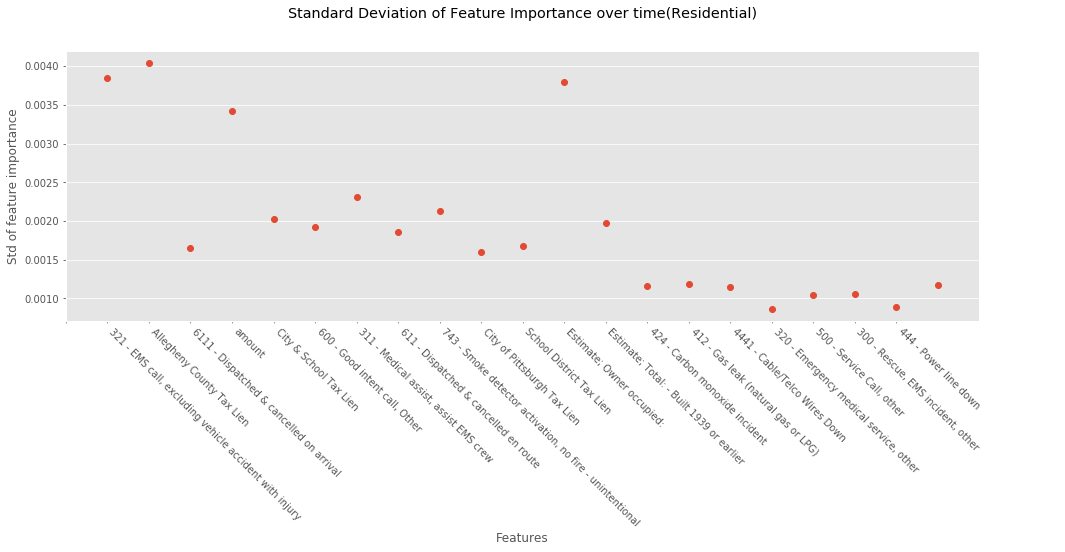

In [960]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

lst_feature = ['']+list(df_fi.index)
df_fi.std(axis=1).plot(style='o', ax = ax, xticks=[])

ax.set_xticks(np.arange(-1, 20), minor=True)
ax.set_xticklabels(lst_feature, minor=True, rotation=-45, ha='left')
ax.set_title("Standard Deviation of Feature Importance over time(Residential)", y=1.1)
ax.set_xlabel('Features')
ax.set_ylabel('Std of feature importance')
plt.tight_layout()
plt.savefig("analysis_plotting/Std of Feature Importance Over Time_Residential.pdf")

### Roc Curve

NameError: name 'lst_df_roc' is not defined

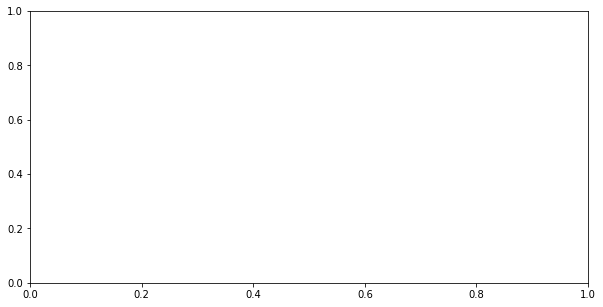

In [67]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

for i in range(len(lst_df_roc)):
    df_roc = lst_df_roc[i].drop(['Unnamed: 0'], axis=1)
    lst_date = [fn.replace("roc_assess/roc_", "").replace(".csv","") for fn in lst_f_roc]

    date = lst_date[i]
    df_roc.plot(x='fpr',y='tpr', ax=ax, label=date)


In [123]:
roc_curve(y_true, y_pred, pos_label=1)

(array([ 0.        ,  0.02228493,  1.        ]),
 array([ 0.        ,  0.44604317,  1.        ]),
 array([ 2.,  1.,  0.]))

### Transferability

We measure the transferability of model signature from very first time window to very end of time window.

In [6]:
lst_f_res.sort()
lst_f_input.sort()
lst_df_pred = []
for filename in lst_f_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)
# lst_df_truth = []
# for filename in lst_f_input:
#     df_truth = pd.read_csv(filename)
#     lst_df_truth.append(df_truth)

In [17]:
df_ini = lst_df_pred[0]
df_pair = lst_df_pred[1]

In [18]:
df_ini = df_ini.drop(['Unnamed: 0'], axis=1)
df_pair = df_pair.drop(['Unnamed: 0'], axis=1)

In [26]:
key_lst = [i for i in df_ini.columns if i not in ['Fire', 'RiskScore']]

In [35]:
(df_ini.merge(df_pair, on=key_lst)).shape

(18209, 12)

In [31]:
df_ini.shape, df_pair.shape

((13958, 10), (13966, 10))

In [39]:
display(df_ini.head()), display(df_pair.head())

,Address,Fire,RiskScore,muni_desc,neigh_desc,owner_desc,school_desc,state_desc,tax_desc,use_desc
0,1 ALGER ST,0.0,0.006490,15th Ward - PITTSBURGH,51C84,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY BOARD OF EDUCATION
1,1 ALLEGHENY AVE,0.0,0.003154,21st Ward - PITTSBURGH,51C14,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY COLLEGE/UNIV/ACADEMY
2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
3,1 BIGELOW SQ,0.0,0.141260,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
4,1 BIGELOW SQ,0.0,0.003794,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS


,Address,Fire,RiskScore,muni_desc,neigh_desc,owner_desc,school_desc,state_desc,tax_desc,use_desc
0,1 ALGER ST,0.0,0.007787,15th Ward - PITTSBURGH,51C84,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY BOARD OF EDUCATION
1,1 BIGELOW SQ,0.0,0.001612,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
2,1 BIGELOW SQ,0.0,0.148396,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
3,1 BIGELOW SQ,0.0,0.002228,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
4,1 BIGELOW SQ,0.0,0.002228,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS


(None, None)

In [54]:
df_ini.reset_index().merge(df_pair.reset_index(), on=key_lst).head()

,index_x,Address,Fire_x,RiskScore_x,muni_desc,neigh_desc,owner_desc,school_desc,state_desc,tax_desc,use_desc,index_y,Fire_y,RiskScore_y
0,0,1 ALGER ST,0.0,0.006490,15th Ward - PITTSBURGH,51C84,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY BOARD OF EDUCATION,0,0.0,0.007787
1,1,1 ALLEGHENY AVE,0.0,0.003154,21st Ward - PITTSBURGH,51C14,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY COLLEGE/UNIV/ACADEMY,1320,1.0,0.744679
2,2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS,1,0.0,0.001612
3,2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS,2,0.0,0.148396
4,2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS,3,0.0,0.002228


In [50]:
df2 = pd.DataFrame({'Key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data2': range(7)})
df1 = pd.DataFrame({'Key': ['a', 'b', 'd'], 'data1': range(3)})

In [51]:
display(df1,df2)

,Key,data1
0,a,0
1,b,1
2,d,2


,Key,data2
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [52]:
pd.concat([df1, df2], axis=1)

,Key,data1,Key,data2
0,a,0.0,b,0
1,b,1.0,b,1
2,d,2.0,a,2
3,NaN,NaN,c,3
4,NaN,NaN,a,4
5,NaN,NaN,a,5
6,NaN,NaN,b,6


In [335]:
lst_prec

[]

In [331]:
y_label = np.concatenate([np.ones((100,1)), np.zeros((length-100,1))], axis=0)
precision_score(df_precision['fire_truth'], y_label)

0.34000000000000002

### ARIMA modeling for metrics

Here is the reference [link](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/). We **Assume** there is a trend in metrics along time axis and we take difference order as 1.

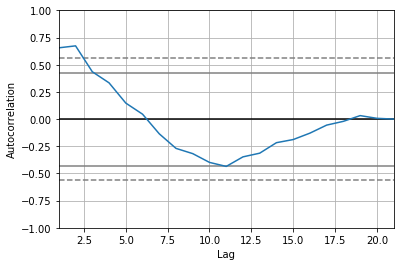

In [31]:
autocorrelation_plot(df_performance['auc'])

In [29]:
# fit model
# df_performance = df_performance.set_index('date')
model = ARIMA(df_performance['accuracy'], order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.accuracy   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 119.280
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 11 Jul 2018   AIC                           -230.559
Time:                        23:34:17   BIC                           -226.577
Sample:                             1   HQIC                          -229.782
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.485e-05   2.06e-05     -0.722      0.480   -5.52e-05    2.55e-05
ar.L1.D.accuracy    -0.0254      0.239     -0.106      0.917      -0.495       0.444
ma.L1.D.accuracy    -0.9998      0.147     -6.789      0.000      -1.288      -0.711
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -39.3205           +0.0000j           39.3205            0.5000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

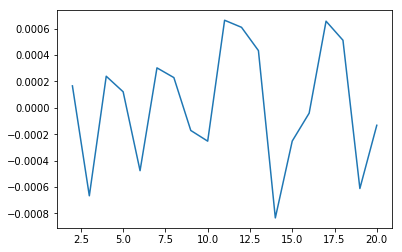

In [24]:
plt.plot(model_fit.predict())

In [35]:
model = ARIMA(df_performance['auc'], order=(2,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.auc   No. Observations:                   20
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  77.319
Method:                       css-mle   S.D. of innovations              0.005
Date:                Wed, 11 Jul 2018   AIC                           -144.638
Time:                        23:48:23   BIC                           -139.659
Sample:                             1   HQIC                          -143.666
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0008      0.001      1.297      0.213      -0.000       0.002
ar.L1.D.auc     0.3781      0.212      1.787      0.093      -0.037       0.793
ar.L2.D.auc     0.5745      0.209      2.746      0.014       0.164       0.984
ma.L1.D.auc    -1.0000      0.073    -13.669      0.000      -1.143      -0.857
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0307           +0.0000j            1.0307            0.0000
AR.2           -1.6889           +0.0000j            1.6889            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

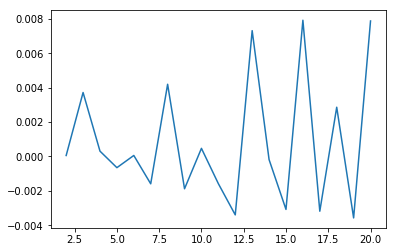

In [26]:
plt.plot(model_fit.predict())

In [486]:
i = []
print(i)
lst = []
lst.append(i)
lst

[]


[[]]

In [497]:
def powerSet(x):
    lst = []
    if not x:
        lst.append(x)
        return lst
    e = [x[0]]
    sub = x[1:]
    for i in powerSet(sub):
        lst.append(i)
        lst.append(i + e)
    return lst
    
powerSet([1,2,3])

[[], [1], [2], [2, 1], [3], [3, 1], [3, 2], [3, 2, 1]]

In [475]:
lst=[]
lst.append([1,2])
lst.append([3]+[1,2])
lst

[[1, 2], [3, 1, 2]]

In [498]:
[1,2] + [4]

[1, 2, 4]